# Data Loading

In the first step, we load the required data for our analysis. We read the electric vehicle population data and the census median income data from their respective CSV files.

In [1]:
import pandas as pd
import numpy as np

electric_vehicle_population = pd.read_csv("EV-data.csv")
census_median_income = pd.read_csv("census-data.csv")

# Clean Vehicle Data

To simplify the column names for easier use in python, we will rename the columns to lowercase and replace spaces with underscores. We will also remove the four rows where the "model" column contains NA values. Additionally, we will create a new column, "vehicle," by combining the "year," "make," and "model" fields.

In [2]:
electric_vehicle_population.columns = electric_vehicle_population.columns.str.lower().str.replace(' ', '_')

electric_vehicle_population_clean = electric_vehicle_population.dropna(subset=['model'])

electric_vehicle_population_clean['vehicle'] = electric_vehicle_population_clean['model_year'].astype(str) + ' ' + electric_vehicle_population_clean['make'] + ' ' + electric_vehicle_population_clean['model']
electric_vehicle_population_clean['postal_code'] = electric_vehicle_population_clean['postal_code'].fillna(0).astype(int).astype(str)
electric_vehicle_population_clean.head()

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,vehicle
0,1N4AZ0CP8D,King,Shoreline,WA,98177,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,32.0,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,2013 NISSAN LEAF
1,5YJSA1E45K,King,Seattle,WA,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,2019 TESLA MODEL S
2,WVGUNPE28M,Kitsap,Olalla,WA,98359,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,272118717,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10,2021 VOLKSWAGEN ID.4
3,JTDKARFP6H,Thurston,Olympia,WA,98501,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,22.0,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10,2017 TOYOTA PRIUS PRIME
4,1FADP5CU9G,Thurston,Olympia,WA,98506,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,22.0,171625653,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10,2016 FORD C-MAX


# Clean Income Data
We are interested in the column `S1903_C03_001E`. To focus on zip codes and income data, we’ll clean the table by extracting zip codes, which are strings starting with “ZCTA5,” and removing the prefix to isolate the zip codes. This will leave us with a simplified table containing two columns: `zip_code` and `median_household_income`. Rows with missing income data are marked with “-”, so we’ll filter those out.

In [3]:
census_median_income.head()

,GEO_ID,NAME,S1903_C01_001E,S1903_C01_001M,S1903_C01_002E,S1903_C01_002M,S1903_C01_003E,S1903_C01_003M,S1903_C01_004E,S1903_C01_004M,...,S1903_C03_036M,S1903_C03_037E,S1903_C03_037M,S1903_C03_038E,S1903_C03_038M,S1903_C03_039E,S1903_C03_039M,S1903_C03_040E,S1903_C03_040M,Unnamed: 242
0,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,NaN
1,8600000US98001,ZCTA5 98001,11648,558,7681,506,716,198,183,100,...,7519,135112,33727,58490,13059,47045,17376,69176,3830,NaN
2,8600000US98002,ZCTA5 98002,13162,583,8812,611,1071,289,299,140,...,4679,70682,15215,39757,7832,33634,2709,81544,27741,NaN
3,8600000US98003,ZCTA5 98003,18515,823,10454,663,2887,553,114,68,...,6290,81797,15871,37839,9764,29226,3739,95114,33065,NaN
4,8600000US98004,ZCTA5 98004,17460,660,10494,616,372,187,26,39,...,11161,131719,34582,118875,15335,117807,17404,119841,48138,NaN


In [4]:
census_median_income_clean = census_median_income.iloc[1:].copy()
census_median_income_clean = census_median_income_clean[['NAME', 'S1903_C03_001E']]
census_median_income_clean = census_median_income_clean.rename(columns={'S1903_C03_001E': 'median_household_income'})
census_median_income_clean = census_median_income_clean.dropna(subset=['median_household_income'])

# Extract zip codes and clean data
census_median_income_clean['zip_code'] = census_median_income_clean['NAME'].str.split(' ').str[-1]
census_median_income_clean = census_median_income_clean[['zip_code', 'median_household_income']]

# Filter out rows with missing income data
census_median_income_clean = census_median_income_clean[census_median_income_clean['median_household_income'] != '-']

census_median_income_clean.head()

,zip_code,median_household_income
1,98001,88962
2,98002,59097
3,98003,59560
4,98004,142173
5,98005,135225


# Investigate Correlation Between Electric Range and Suggested Price

In the next section, we aim to investigate whether there is a correlation between the electric range of vehicles and their suggested price (base MSRP). This analysis will help us understand if vehicles with a higher electric range tend to have a higher suggested price.

In [5]:
# we are only interested in the vehicles where the base_msrp & electric_range is not set to 0
electric_vehicle_msrp = electric_vehicle_population_clean[(electric_vehicle_population_clean['base_msrp'] > 0 ) & (electric_vehicle_population_clean['electric_range'] > 0)]

# Remove duplicates based on the 'vehicle' column and select the required columns
electric_vehicle_msrp = electric_vehicle_msrp.drop_duplicates(subset='vehicle')[['vehicle', 'base_msrp', 'electric_range', 'model_year', 'make', 'model']]

electric_vehicle_msrp.head()

,vehicle,base_msrp,electric_range,model_year,make,model
52,2017 BMW 330E,44100.0,14.0,2017,BMW,330E
66,2016 KIA SOUL,31950.0,93.0,2016,KIA,SOUL
132,2014 TESLA MODEL S,69900.0,208.0,2014,TESLA,MODEL S
175,2019 BMW 530E,53400.0,16.0,2019,BMW,530E
252,2012 TESLA MODEL S,59900.0,265.0,2012,TESLA,MODEL S


To enhance the significance of our regression analysis, we will first identify and eliminate outliers from our dataset.

In [6]:
Q1 = electric_vehicle_msrp['base_msrp'].quantile(0.25)
Q3 = electric_vehicle_msrp['base_msrp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = electric_vehicle_msrp[(electric_vehicle_msrp['base_msrp'] < lower_bound) | (electric_vehicle_msrp['base_msrp'] > upper_bound)]

outliers

,vehicle,base_msrp,electric_range,model_year,make,model
9171,2018 PORSCHE PANAMERA,184400.0,14.0,2018,PORSCHE,PANAMERA
43783,2015 PORSCHE 918,845000.0,12.0,2015,PORSCHE,918


In [7]:
# we remove the Porsche 918 from the dataset
electric_vehicle_population_clean = electric_vehicle_population_clean[electric_vehicle_population_clean['model'] != 'PANAMERA']
electric_vehicle_msrp = electric_vehicle_msrp[electric_vehicle_msrp['model'] != 'PANAMERA']
electric_vehicle_population_clean = electric_vehicle_population_clean[electric_vehicle_population_clean['model'] != '918']
electric_vehicle_msrp = electric_vehicle_msrp[electric_vehicle_msrp['model'] != '918']

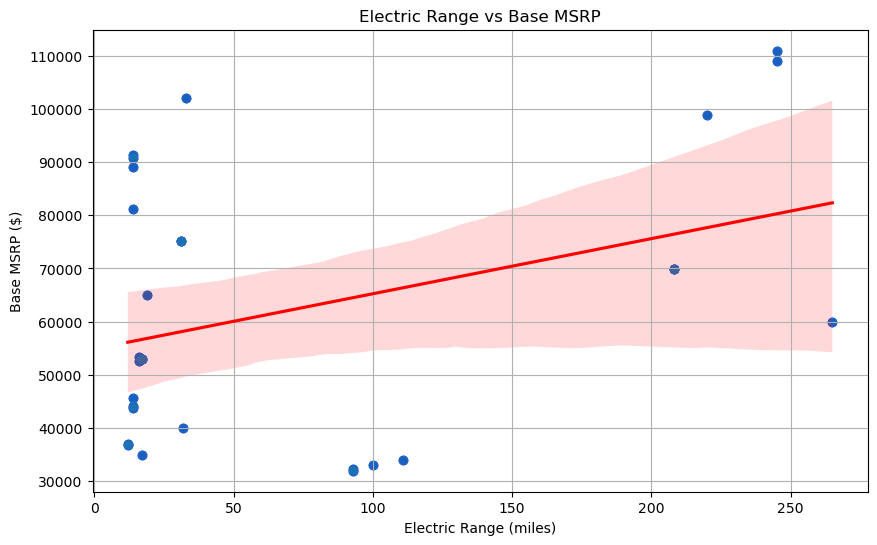

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


slope, intercept, r_value, p_value, std_err = stats.linregress(electric_vehicle_msrp['electric_range'], electric_vehicle_msrp['base_msrp'])

plt.figure(figsize=(10, 6))
plt.scatter(electric_vehicle_msrp['electric_range'], electric_vehicle_msrp['base_msrp'], color='blue')
sns.regplot(x='electric_range', y='base_msrp', data=electric_vehicle_msrp, line_kws={'color': 'red'})
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.grid(True)
plt.show()

There appears to be a positive correlation between electric range and base MSRP. Let's delve deeper into these numbers to better understand this relationship.

In [9]:
print(f"Regression statistics for Electric Range vs Base MSRP:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")

Regression statistics for Electric Range vs Base MSRP:
Slope: 103.65582756121574
Intercept: 54870.86844298481
R-squared value: 0.12825946480850317
P-value: 0.05644378807262047
Standard error: 52.00687395961595



These results indicate a weak positive correlation between electric range and base MSRP, with the R-squared value suggesting that only about 12.8% of the variance in base MSRP can be explained by the electric range. The high p-value indicates that the relationship is not statistically significant.


# Investigate Factors Influencing Units Sold

To understand what factors influence the number of units sold, we will create a new dataset that aggregates the total units sold per vehicle model. This will allow us to analyze the relationship between various attributes (such as electric range, base MSRP, and model year) and the total units sold for each model.

In [10]:
electric_vehicle_population_clean['base_msrp'] = electric_vehicle_population_clean['base_msrp'].replace(0, np.nan)
electric_vehicle_population_clean['electric_range'] = electric_vehicle_population_clean['electric_range'].replace(0, np.nan)

# Group by vehicle, electric_range, and base_msrp and count the number of vehicles
electric_vehicle_count = electric_vehicle_population_clean.groupby(['vehicle']).size().reset_index(name='vehicle_n')
electric_vehicle_count = electric_vehicle_count.sort_values(by='vehicle_n', ascending=False)
electric_vehicle_count = electric_vehicle_count.reset_index(drop=True)

electric_range_count = electric_vehicle_population_clean.groupby(['electric_range']).size().reset_index(name='vehicle_n')
electric_range_count = electric_range_count.sort_values(by='vehicle_n', ascending=False)
electric_range_count = electric_range_count.reset_index(drop=True)
electric_range_count = electric_range_count[electric_range_count['electric_range'] > 0]
electric_range_count.head()

electric_msrp_count = electric_vehicle_population_clean.groupby(['base_msrp']).size().reset_index(name='vehicle_n')
electric_msrp_count = electric_msrp_count.sort_values(by='vehicle_n', ascending=False)
electric_msrp_count = electric_msrp_count.reset_index(drop=True)
electric_msrp_count = electric_msrp_count[electric_msrp_count['base_msrp'] > 0]
electric_msrp_count.head()

,base_msrp,vehicle_n
0,69900.0,1340
1,31950.0,363
2,52900.0,222
3,32250.0,142
4,59900.0,128


## Electric Range vs Number of Vehicles Sold

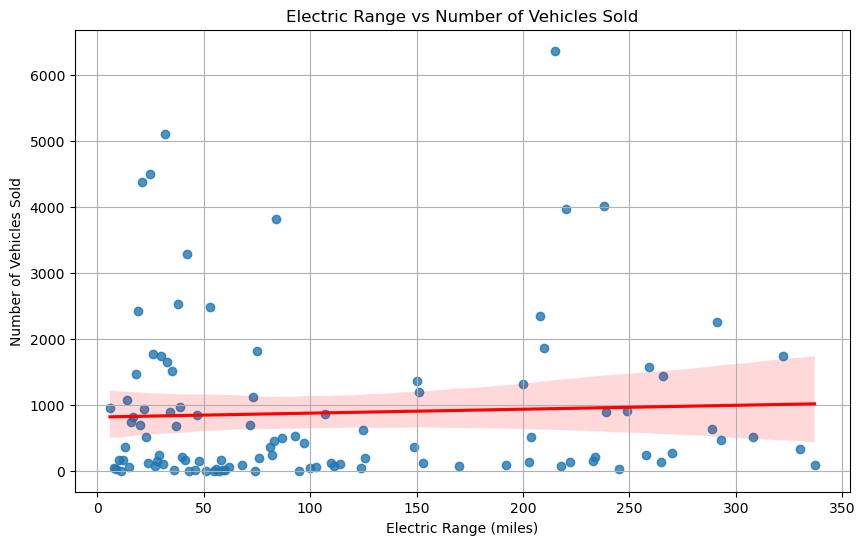

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(electric_range_count['electric_range'], electric_range_count['vehicle_n'])

plt.figure(figsize=(10, 6))
sns.regplot(x='electric_range', y='vehicle_n', data=electric_range_count, line_kws={'color': 'red'})
plt.title('Electric Range vs Number of Vehicles Sold')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles Sold')
plt.grid(True)
plt.show()

In [12]:
print(f"Regression statistics for Electric Range vs Number of Vehicles Sold:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared value: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")


Regression statistics for Electric Range vs Number of Vehicles Sold:
Slope: 0.5951974167814011
Intercept: 815.7062797786741
R-squared value: 0.0020742598659191183
P-value: 0.6445542529627962
Standard error: 1.28635238330571



The regression analysis for Electric Range vs Number of Vehicles Sold shows a slope of 0.595, indicating a slight positive relationship between electric range and the number of vehicles sold. However, the R-squared value is very low (0.002), suggesting that electric range explains only a small fraction of the variance in the number of vehicles sold. The high p-value (0.644) indicates that this relationship is not statistically significant. The standard error of the slope is 1.286, reflecting the variability in the estimate of the slope.


### Kendall Correlation Coefficient

The Kendall correlation coefficient, also known as Kendall's tau, is a measure of the ordinal association between two measured quantities. It assesses how well the relationship between two variables can be described using a monotonic function. The coefficient ranges from -1 to 1, where:
- 1 indicates a perfect positive relationship,
- -1 indicates a perfect negative relationship,
- 0 indicates no relationship.

In [13]:
from scipy.stats import kendalltau

range_cor, p_value = kendalltau(electric_range_count['electric_range'], electric_range_count['vehicle_n'])

print(f"Kendall correlation coefficient: {range_cor}")
print(f"P-value: {p_value}")

Kendall correlation coefficient: 0.037383183219214994
P-value: 0.5721645350424359


The Kendall correlation coefficient between electric range and the number of vehicles sold is 0.037, with a p-value of 0.572. This indicates a very weak positive relationship between the two variables. However, the high p-value suggests that this relationship is not statistically significant, meaning that we cannot confidently assert that there is any meaningful association between electric range and the number of vehicles sold based on this data.

## Base MSRP vs Number of Vehicles Sold

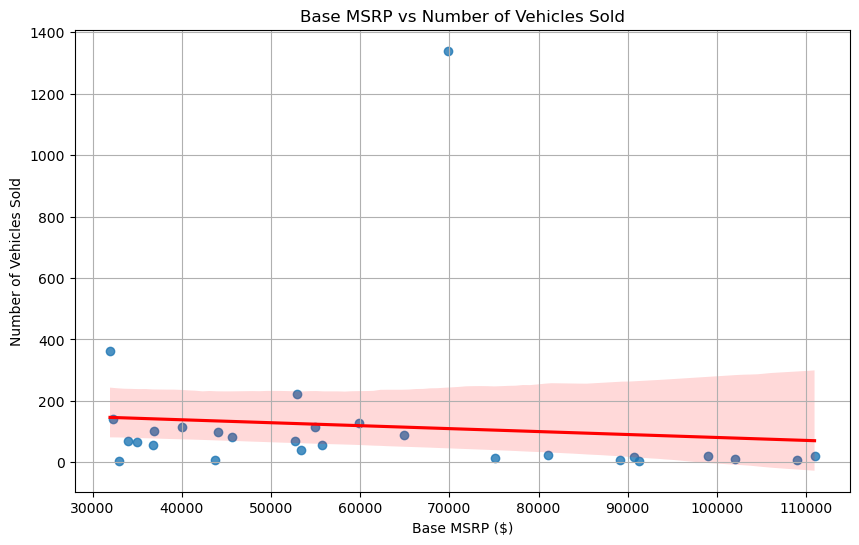

In [14]:
slope_msrp, intercept_msrp, r_value_msrp, p_value_msrp, std_err_msrp = stats.linregress(electric_msrp_count['base_msrp'], electric_msrp_count['vehicle_n'])

plt.figure(figsize=(10, 6))
sns.regplot(x='base_msrp', y='vehicle_n', data=electric_msrp_count, line_kws={'color': 'red'})
plt.title('Base MSRP vs Number of Vehicles Sold')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Number of Vehicles Sold')
plt.grid(True)
plt.show()

In [15]:
print("\nRegression statistics for Base MSRP vs Number of Vehicles Sold:")
print(f"Slope: {slope_msrp}")
print(f"Intercept: {intercept_msrp}")
print(f"R-squared value: {r_value_msrp**2}")
print(f"P-value: {p_value_msrp}")
print(f"Standard error: {std_err_msrp}")


Regression statistics for Base MSRP vs Number of Vehicles Sold:
Slope: -0.0009604593362655655
Intercept: 176.9104817990562
R-squared value: 0.009566168282526882
P-value: 0.6205021096661862
Standard error: 0.00191662007929832



The regression analysis for Base MSRP vs Number of Vehicles Sold indicates a very weak negative relationship between base MSRP and the number of vehicles sold. The R-squared value is extremely low (0.009), suggesting that base MSRP explains only about .9% of the variance in the number of vehicles sold. The high p-value (0.62) indicates that this relationship is not statistically significant. The standard error of the slope is 0.0019, reflecting the variability in the estimate of the slope.


In [16]:
msrp_cor, p_value_msrp = kendalltau(electric_msrp_count['base_msrp'], electric_msrp_count['vehicle_n'])

print(f"Kendall correlation coefficient: {msrp_cor}")
print(f"P-value: {p_value_msrp}")

Kendall correlation coefficient: -0.3342186823915959
P-value: 0.012763758676205309



The Kendall correlation coefficient between the two variables is -0.33, indicating a moderate negative relationship. This means that as one variable increases, the other variable tends to decrease. The p-value is 0.012, which is less than the typical significance level of 0.05. This suggests that the negative relationship is statistically significant, and we can reject the null hypothesis that there is no association between the two variables.
Howvery, highly prized cars often are not always targeted for the mass market, and this has to be taken into account when interpreting the correlation results.

# Regression Tree

In [17]:
electric_vehicle_population_clean['postal_code'] = electric_vehicle_population_clean['postal_code'].astype(str)
census_median_income_clean['zip_code'] = census_median_income_clean['zip_code'].astype(str)

# Merge the dataframes on zip code
electric_vehicle_byzip = pd.merge(electric_vehicle_population_clean, census_median_income_clean, left_on='postal_code', right_on='zip_code')

vehicle_income_count = electric_vehicle_byzip.groupby('vehicle').agg(
    vehicle_n=('vehicle', 'size'),
    electric_vehicle_type=('electric_vehicle_type', 'first'),
    clean_alternative_fuel_vehicle_cafv_eligibility=('clean_alternative_fuel_vehicle_(cafv)_eligibility', 'first'),
    base_msrp=('base_msrp', 'median'),
    electric_range=('electric_range', 'median'),
    median_household_income=('median_household_income', 'median')
).reset_index()

# vehicle_income_count['base_msrp'] = vehicle_income_count['base_msrp'].fillna(vehicle_income_count['base_msrp'].mean())
# vehicle_income_count['electric_range'] = vehicle_income_count['electric_range'].fillna(vehicle_income_count['electric_range'].mean())

In [18]:

vehicle_income_count['electric_vehicle_type'] = vehicle_income_count['electric_vehicle_type'].astype('category').cat.codes
vehicle_income_count['clean_alternative_fuel_vehicle_cafv_eligibility'] = vehicle_income_count['clean_alternative_fuel_vehicle_cafv_eligibility'].astype('category').cat.codes
vehicle_income_count

,vehicle,vehicle_n,electric_vehicle_type,clean_alternative_fuel_vehicle_cafv_eligibility,base_msrp,electric_range,median_household_income
0,1999 FORD RANGER,2,0,0,NaN,74.0,69277.0
1,2000 FORD RANGER,7,0,0,NaN,58.0,73702.0
2,2002 TOYOTA RAV4,2,0,0,NaN,95.0,122446.0
3,2003 TOYOTA RAV4,1,0,0,NaN,95.0,71567.0
4,2008 TESLA ROADSTER,23,0,0,98950.0,220.0,105480.0
...,...,...,...,...,...,...,...
525,2025 VOLVO EX40,4,0,1,NaN,NaN,108070.0
526,2025 VOLVO S60,7,1,0,NaN,41.0,101847.0
527,2025 VOLVO V60,8,1,0,NaN,41.0,87150.0
528,2025 VOLVO XC60,95,1,0,NaN,35.0,102352.0


In [19]:
entries_base_msrp_nan = vehicle_income_count['base_msrp'].isna().sum()
entries_electric_range_nan = vehicle_income_count['electric_range'].isna().sum()
entries_base_msrp_not_nan = vehicle_income_count['base_msrp'].notna().sum()
entries_electric_range_not_nan = vehicle_income_count['electric_range'].notna().sum()

print(f"Entries where base_msrp is 0:\n{entries_base_msrp_nan}")
print(f"Entries where base_msrp is not 0:\n{entries_base_msrp_not_nan}")
print(f"Entries where electric_range is 0:\n{entries_electric_range_nan}")
print(f"Entries where electric_range is not 0:\n{entries_electric_range_not_nan}")

Entries where base_msrp is 0:
501
Entries where base_msrp is not 0:
29
Entries where electric_range is 0:
171
Entries where electric_range is not 0:
359


Since `base_msrp` and `electric_range` are often zero, we will fit different regression trees: one with all values and attributes, one without both attributes, and one where entries with these attributes are removed.


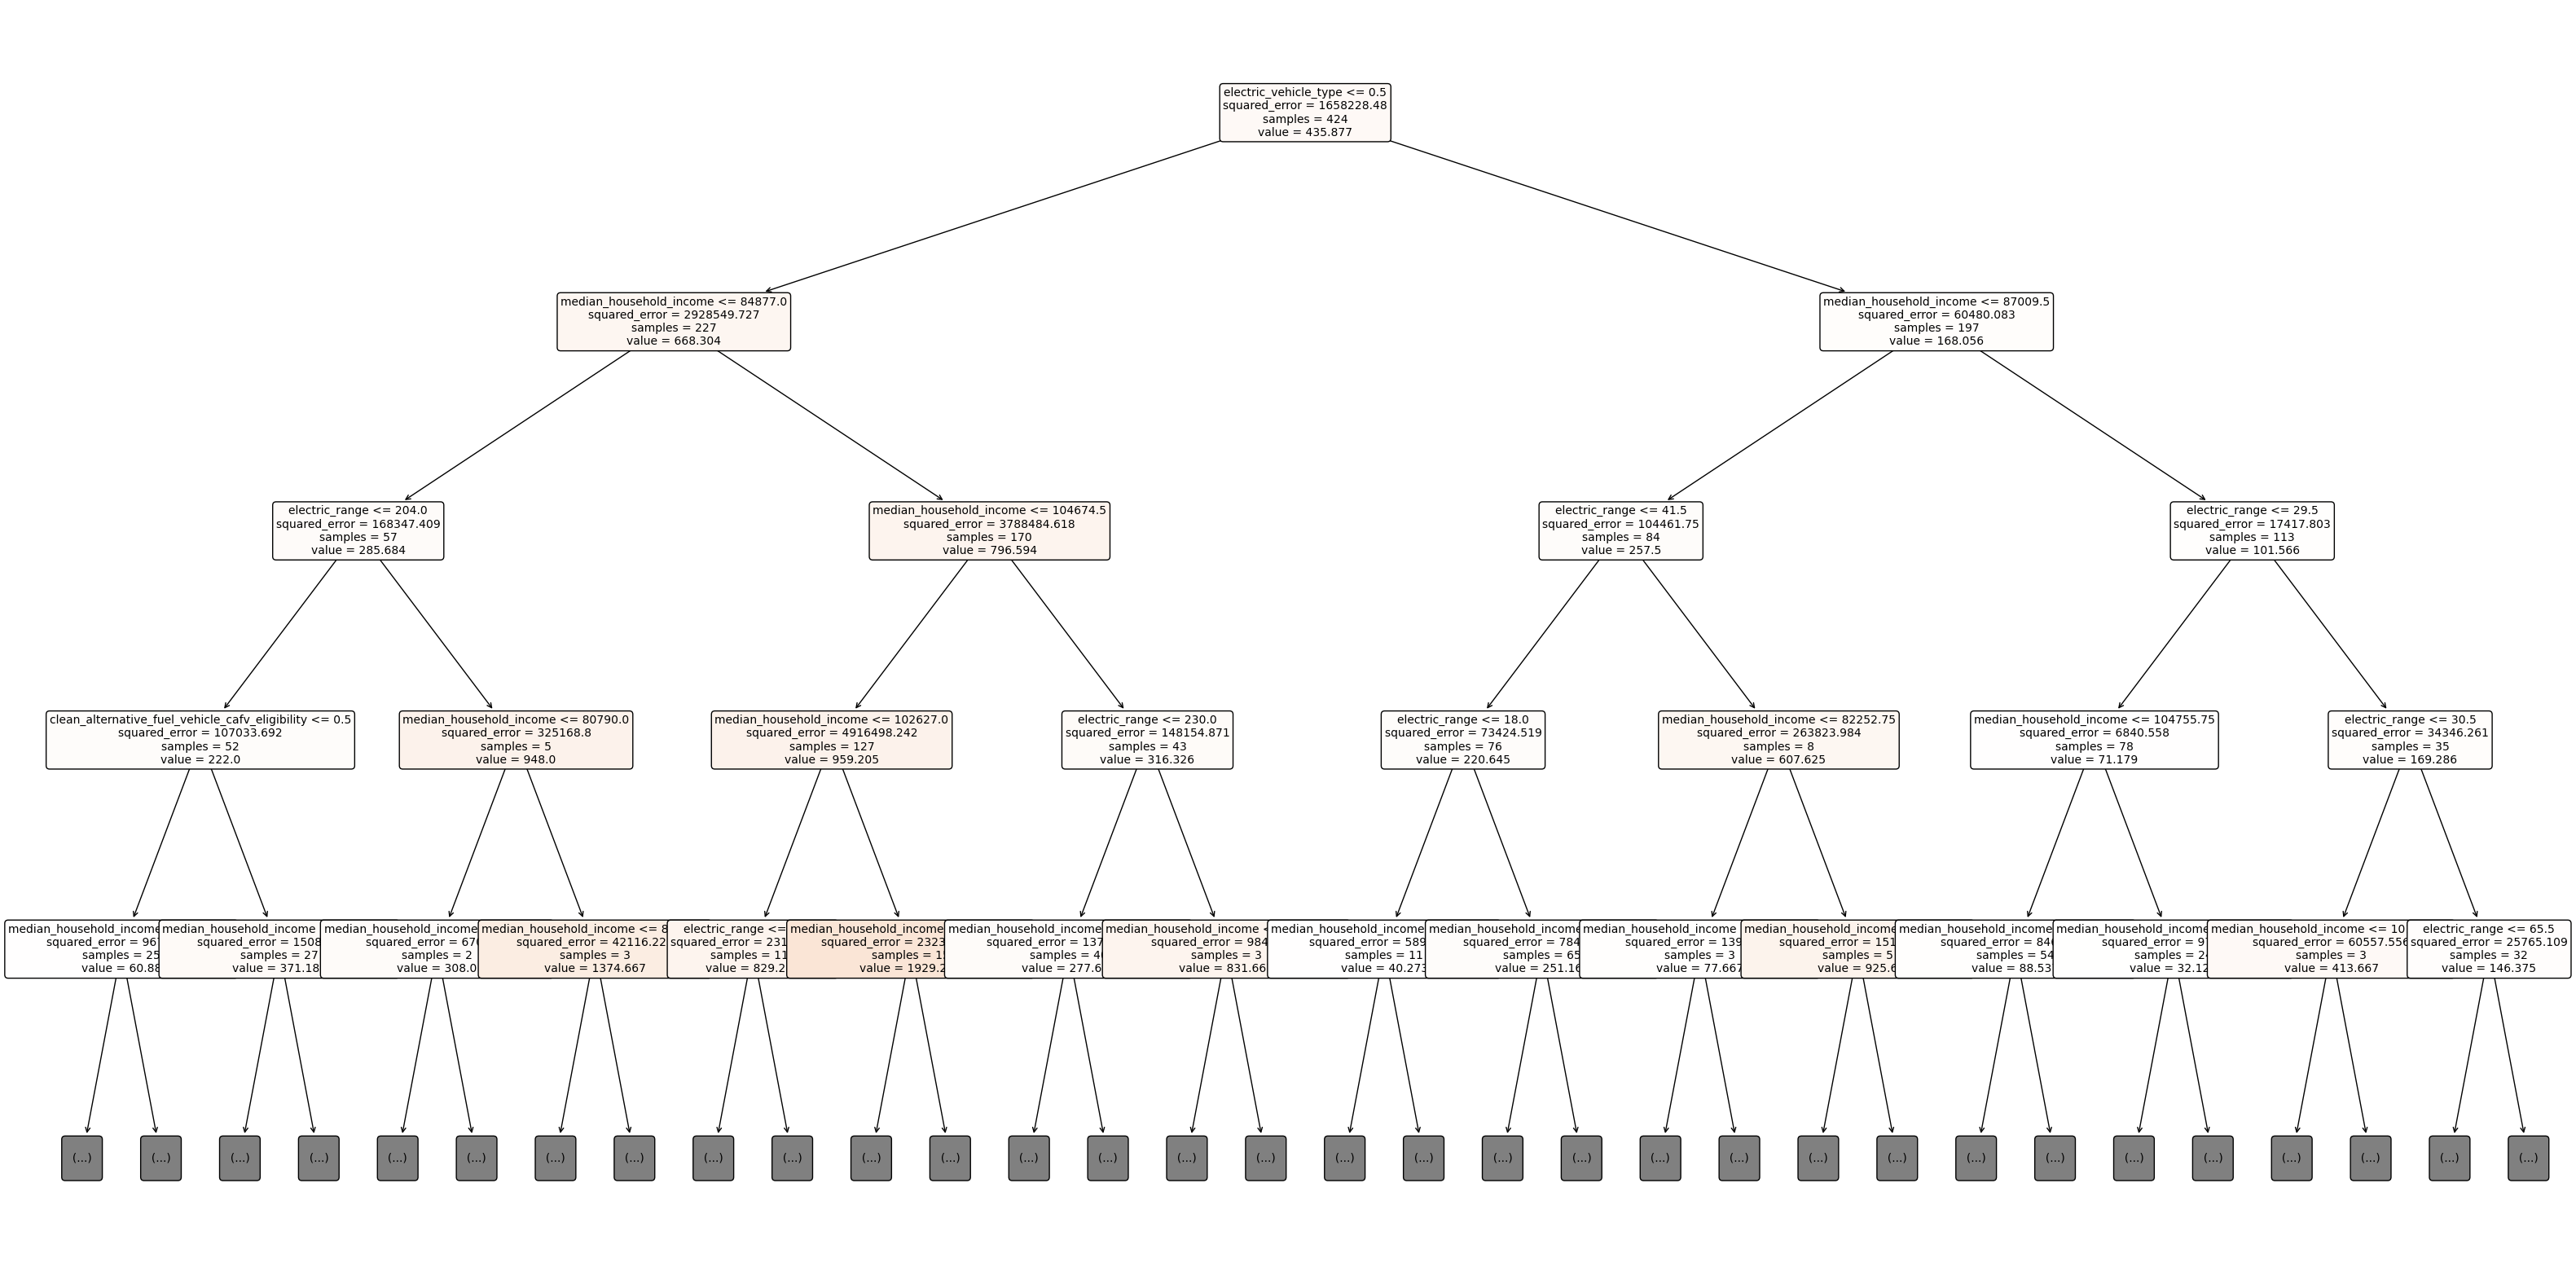

     Actual  Predicted
140      71      118.0
398     688        7.0
6         3      118.0
334     147      256.0
322     212      670.0


In [20]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

vehicle_income_count['base_msrp'] = vehicle_income_count['base_msrp'].fillna(0)
vehicle_income_count['electric_range'] = vehicle_income_count['electric_range'].fillna(0)

# Prepare the data
X = vehicle_income_count.drop(columns=['vehicle', 'vehicle_n'])
y = vehicle_income_count['vehicle_n']

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression tree
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)


# Improve plot readability
plt.figure(figsize=(40, 20))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=4)
plt.show()

y_pred = regressor.predict(X_test)
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head())

In [21]:
from sklearn.metrics import mean_squared_error

# Calculate R-squared value for training data
r_squared_train = regressor.score(X_train, y_train)
print(f"R-squared value for training data: {r_squared_train}")

# Calculate R-squared value for testing data
r_squared_test = regressor.score(X_test, y_test)
print(f"R-squared value for testing data: {r_squared_test}")
# Calculate mean squared error for testing data
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for testing data: {mse_test}")

R-squared value for training data: 0.5275539995482996
R-squared value for testing data: -0.060452341388850916
Mean Squared Error for testing data: 437553.87028301886



- **R-squared value for training data: 0.52**
    - This value indicates that approximately 52% of the variance in the training data is explained by the model. This suggests a moderate fit of the model to the training data.

- **R-squared value for testing data: -0.06**
    - This negative value indicates that the model performs poorly on the testing data. A negative R-squared value suggests that the model is worse than a horizontal line (mean of the data) at predicting the target variable. This could be a sign of overfitting, where the model fits the training data well but fails to generalize to new, unseen data.

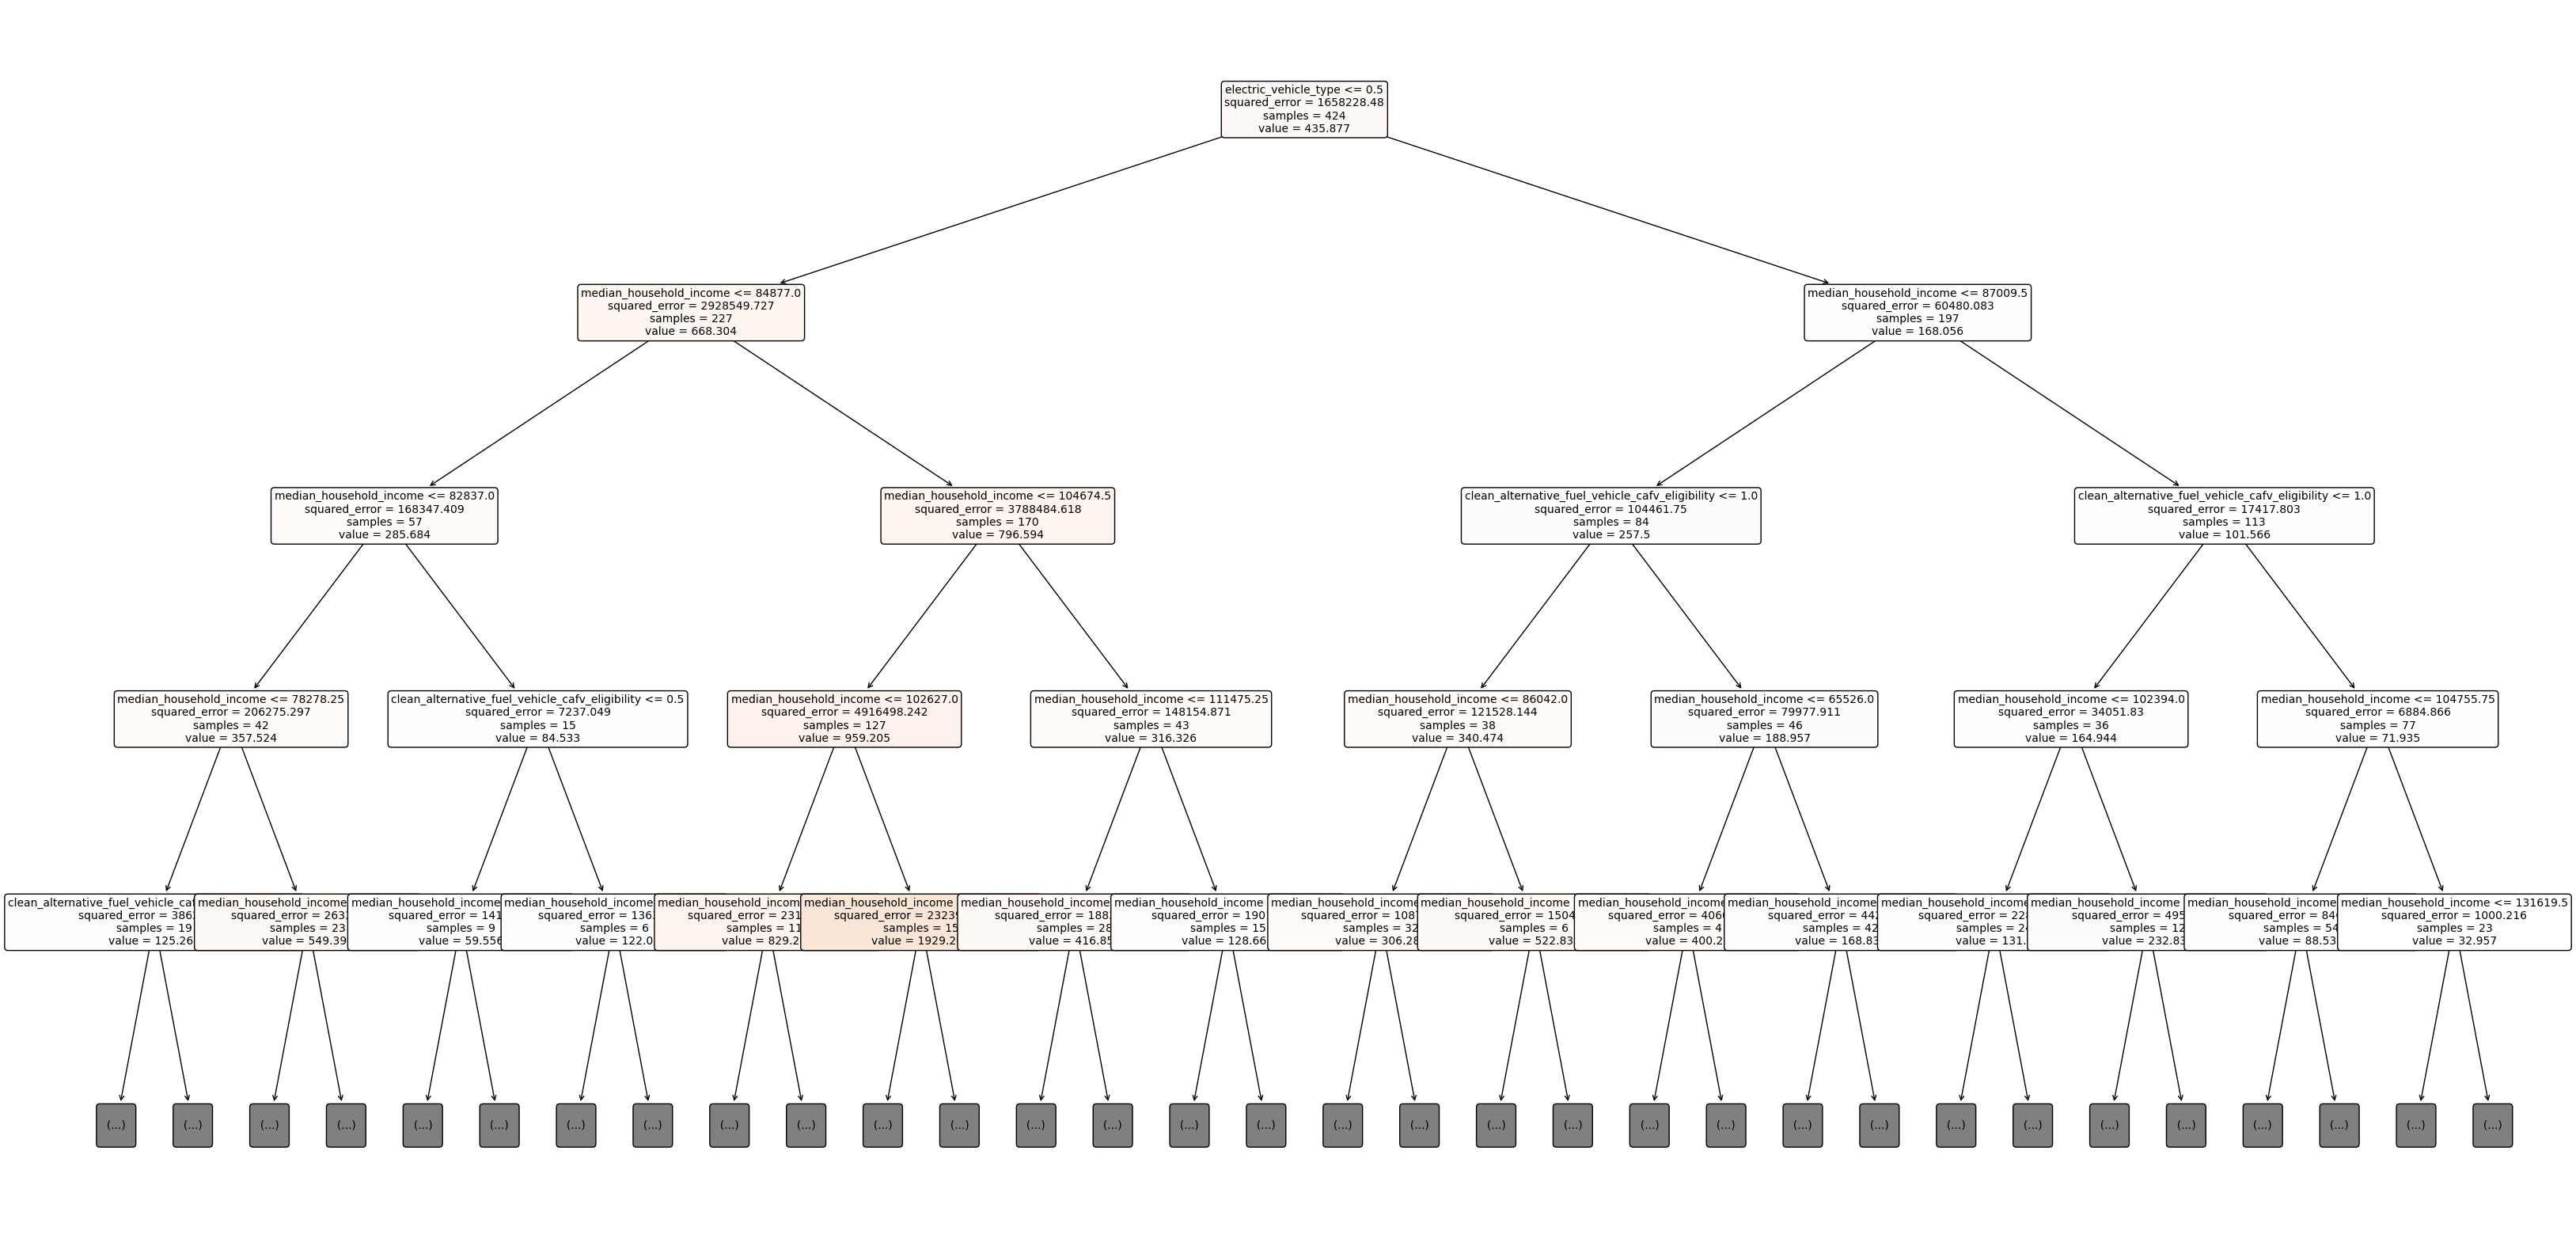

     Actual  Predicted
140      71     1723.0
398     688      398.0
6         3      269.5
334     147      211.0
322     212       11.0


In [22]:
# Prepare the data
X = vehicle_income_count.drop(columns=['vehicle', 'base_msrp', 'electric_range', 'vehicle_n'])
y = vehicle_income_count['vehicle_n']

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression tree
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)


# Improve plot readability
plt.figure(figsize=(40, 20))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=4)
plt.show()

y_pred = regressor.predict(X_test)
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head())

In [23]:
# Calculate R-squared value for training data
r_squared_train = regressor.score(X_train, y_train)
print(f"R-squared value for training data: {r_squared_train}")

# Calculate R-squared value for testing data
r_squared_test = regressor.score(X_test, y_test)
print(f"R-squared value for testing data: {r_squared_test}")
# Calculate mean squared error for testing data
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for testing data: {mse_test}")

R-squared value for training data: 0.5179232787031154
R-squared value for testing data: 0.1693856126269625
Mean Squared Error for testing data: 342720.2955974842



Removing these attributes does not provide us with a better regression tree. Let's try to remove the corresponding entries instead.


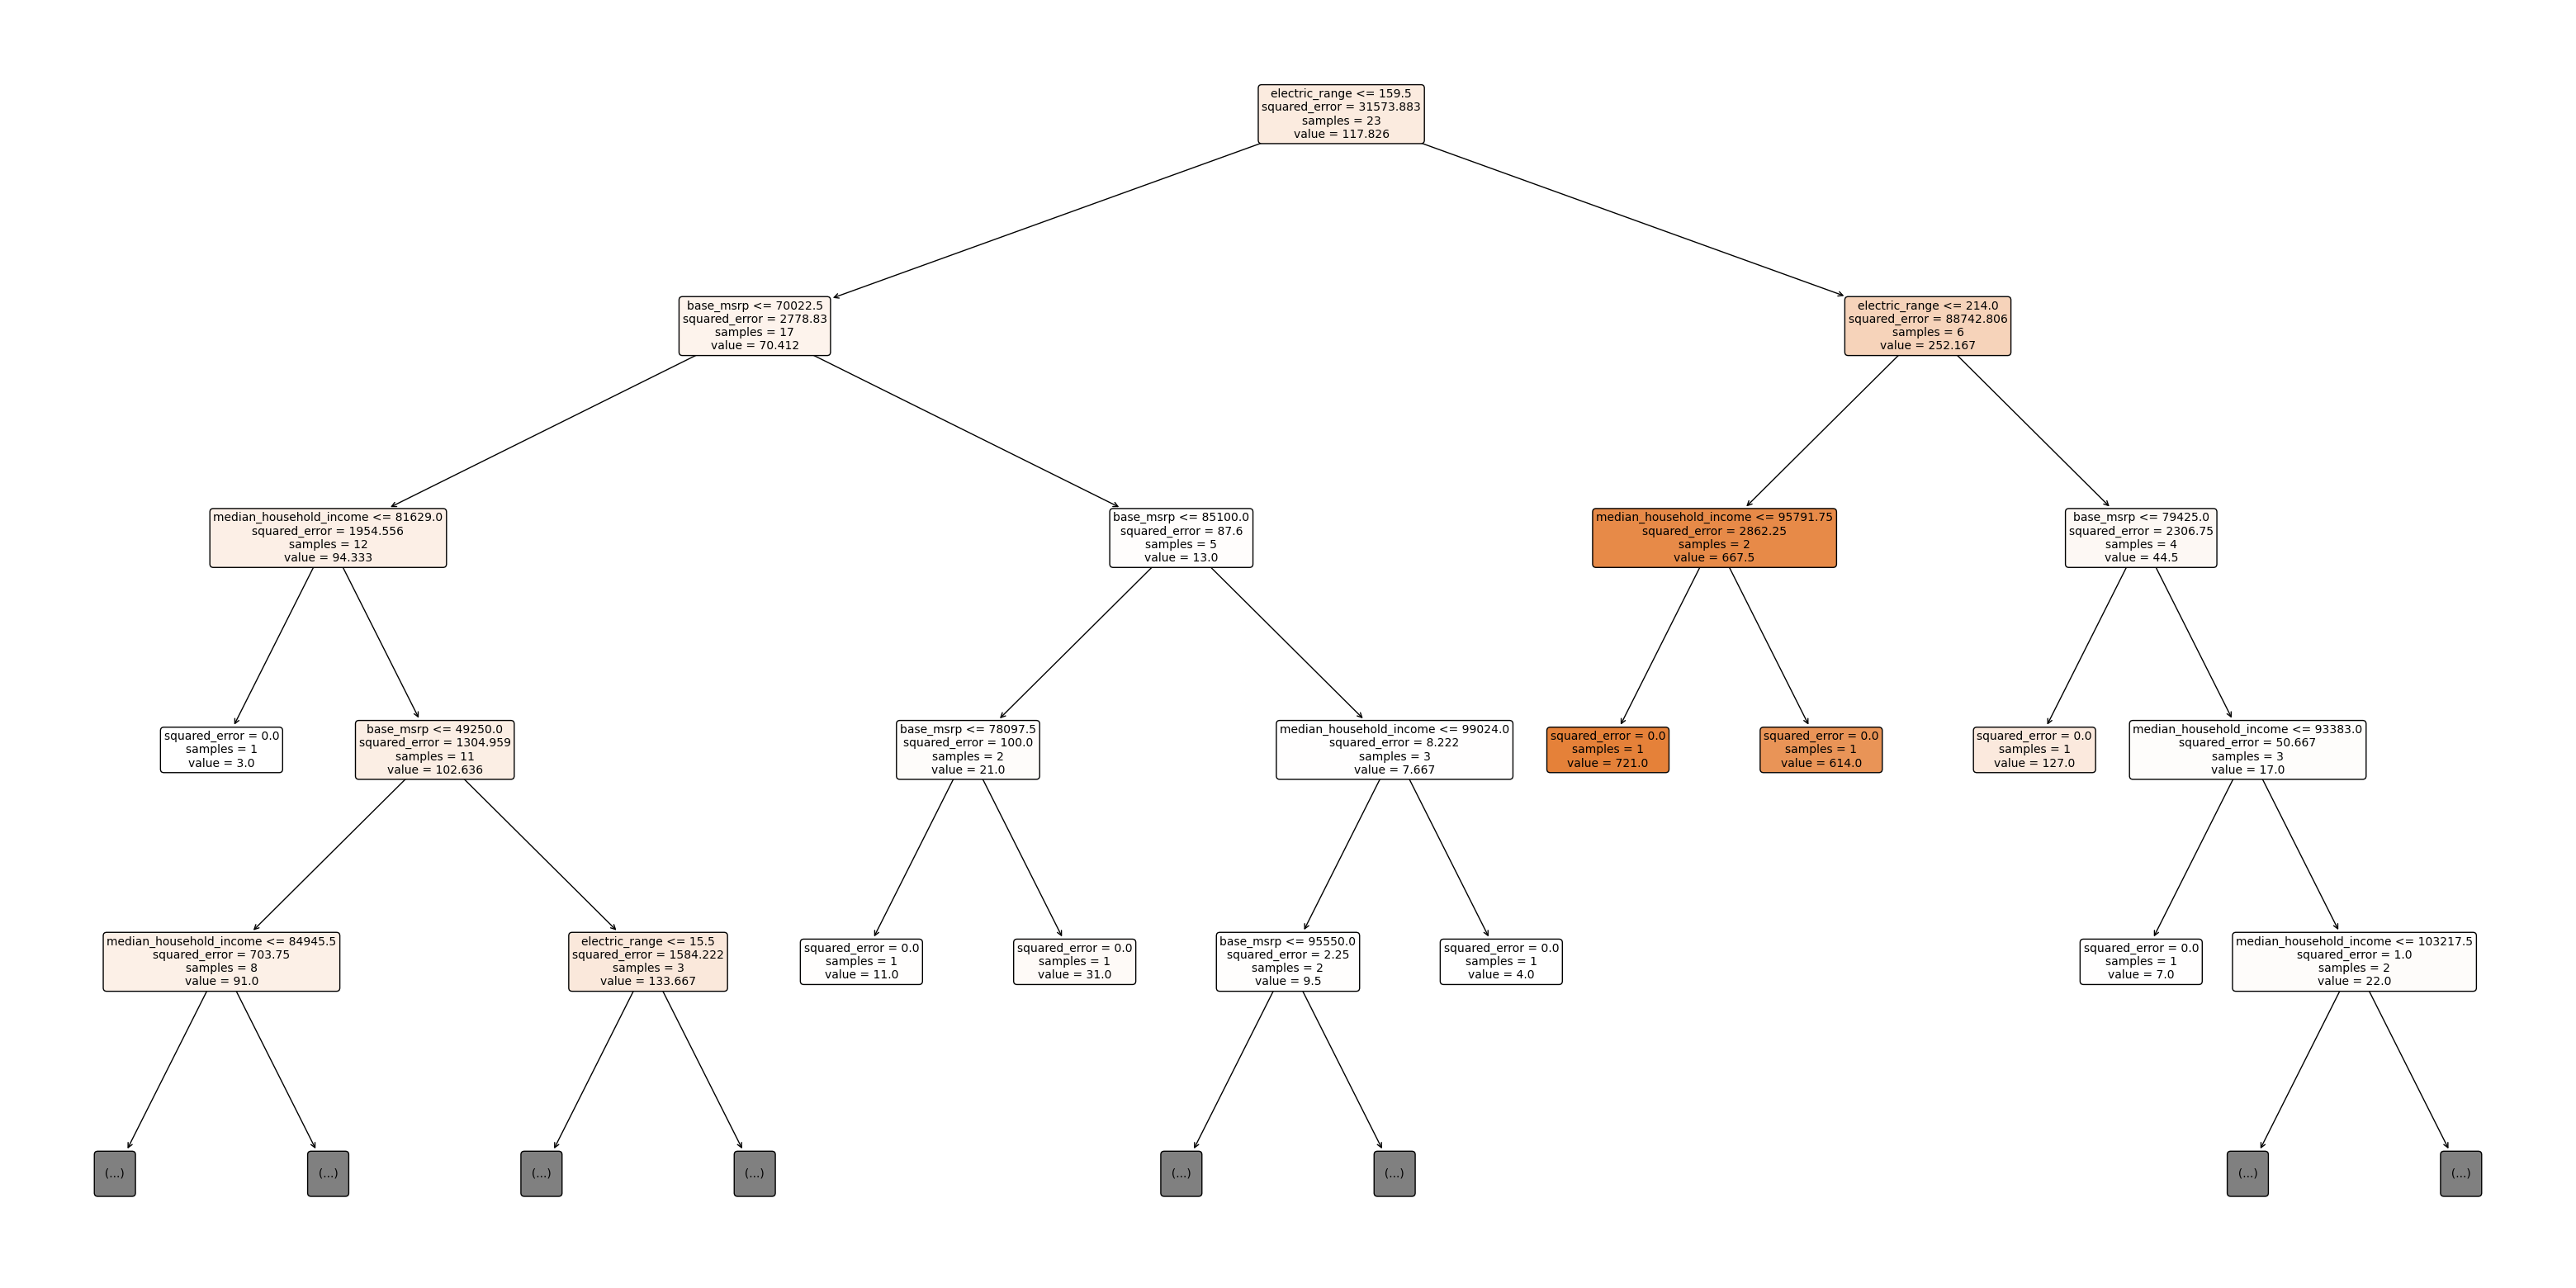

     Actual  Predicted
189     115      128.0
126      16        8.0
97        2       11.0
158      96      185.0
66        8       81.0


In [24]:
# Remove entries where base_msrp and electric_range are 0
vehicle_income_count_nonzero = vehicle_income_count[(vehicle_income_count['base_msrp'] != 0)]

vehicle_income_count_nonzero = vehicle_income_count_nonzero[(vehicle_income_count_nonzero['electric_range'] != 0)]
# Prepare the data
X = vehicle_income_count_nonzero.drop(columns=['vehicle', 'vehicle_n'])
y = vehicle_income_count_nonzero['vehicle_n']

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression tree
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)


# Improve plot readability
plt.figure(figsize=(40, 20))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=4)
plt.show()

y_pred = regressor.predict(X_test)
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head())

In [25]:
# Calculate R-squared value for training data
r_squared_train = regressor.score(X_train, y_train)
print(f"R-squared value for training data: {r_squared_train}")

# Calculate R-squared value for testing data
r_squared_test = regressor.score(X_test, y_test)
print(f"R-squared value for testing data: {r_squared_test}")
# Calculate mean squared error for testing data
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for testing data: {mse_test}")


R-squared value for training data: 1.0
R-squared value for testing data: -0.07628183876337857
Mean Squared Error for testing data: 16863.333333333332


Now we get very good results for the training data and better results for the test data. However, this improvement could also be due to the reduced size of our dataset after removing these entries.

# Final remarks

It is very difficult to find meaningful insights into what factors influence sales. The regressions suggest that electric range slightly correlates positively and price slightly correlates negatively, but these correlations are not statistically significant. From the regression tree, we cannot really gain any insights. We guess that this is because Teslas are just super popular in the state of Washington, and people tend to favor the brand over the attributes provided in this dataset.

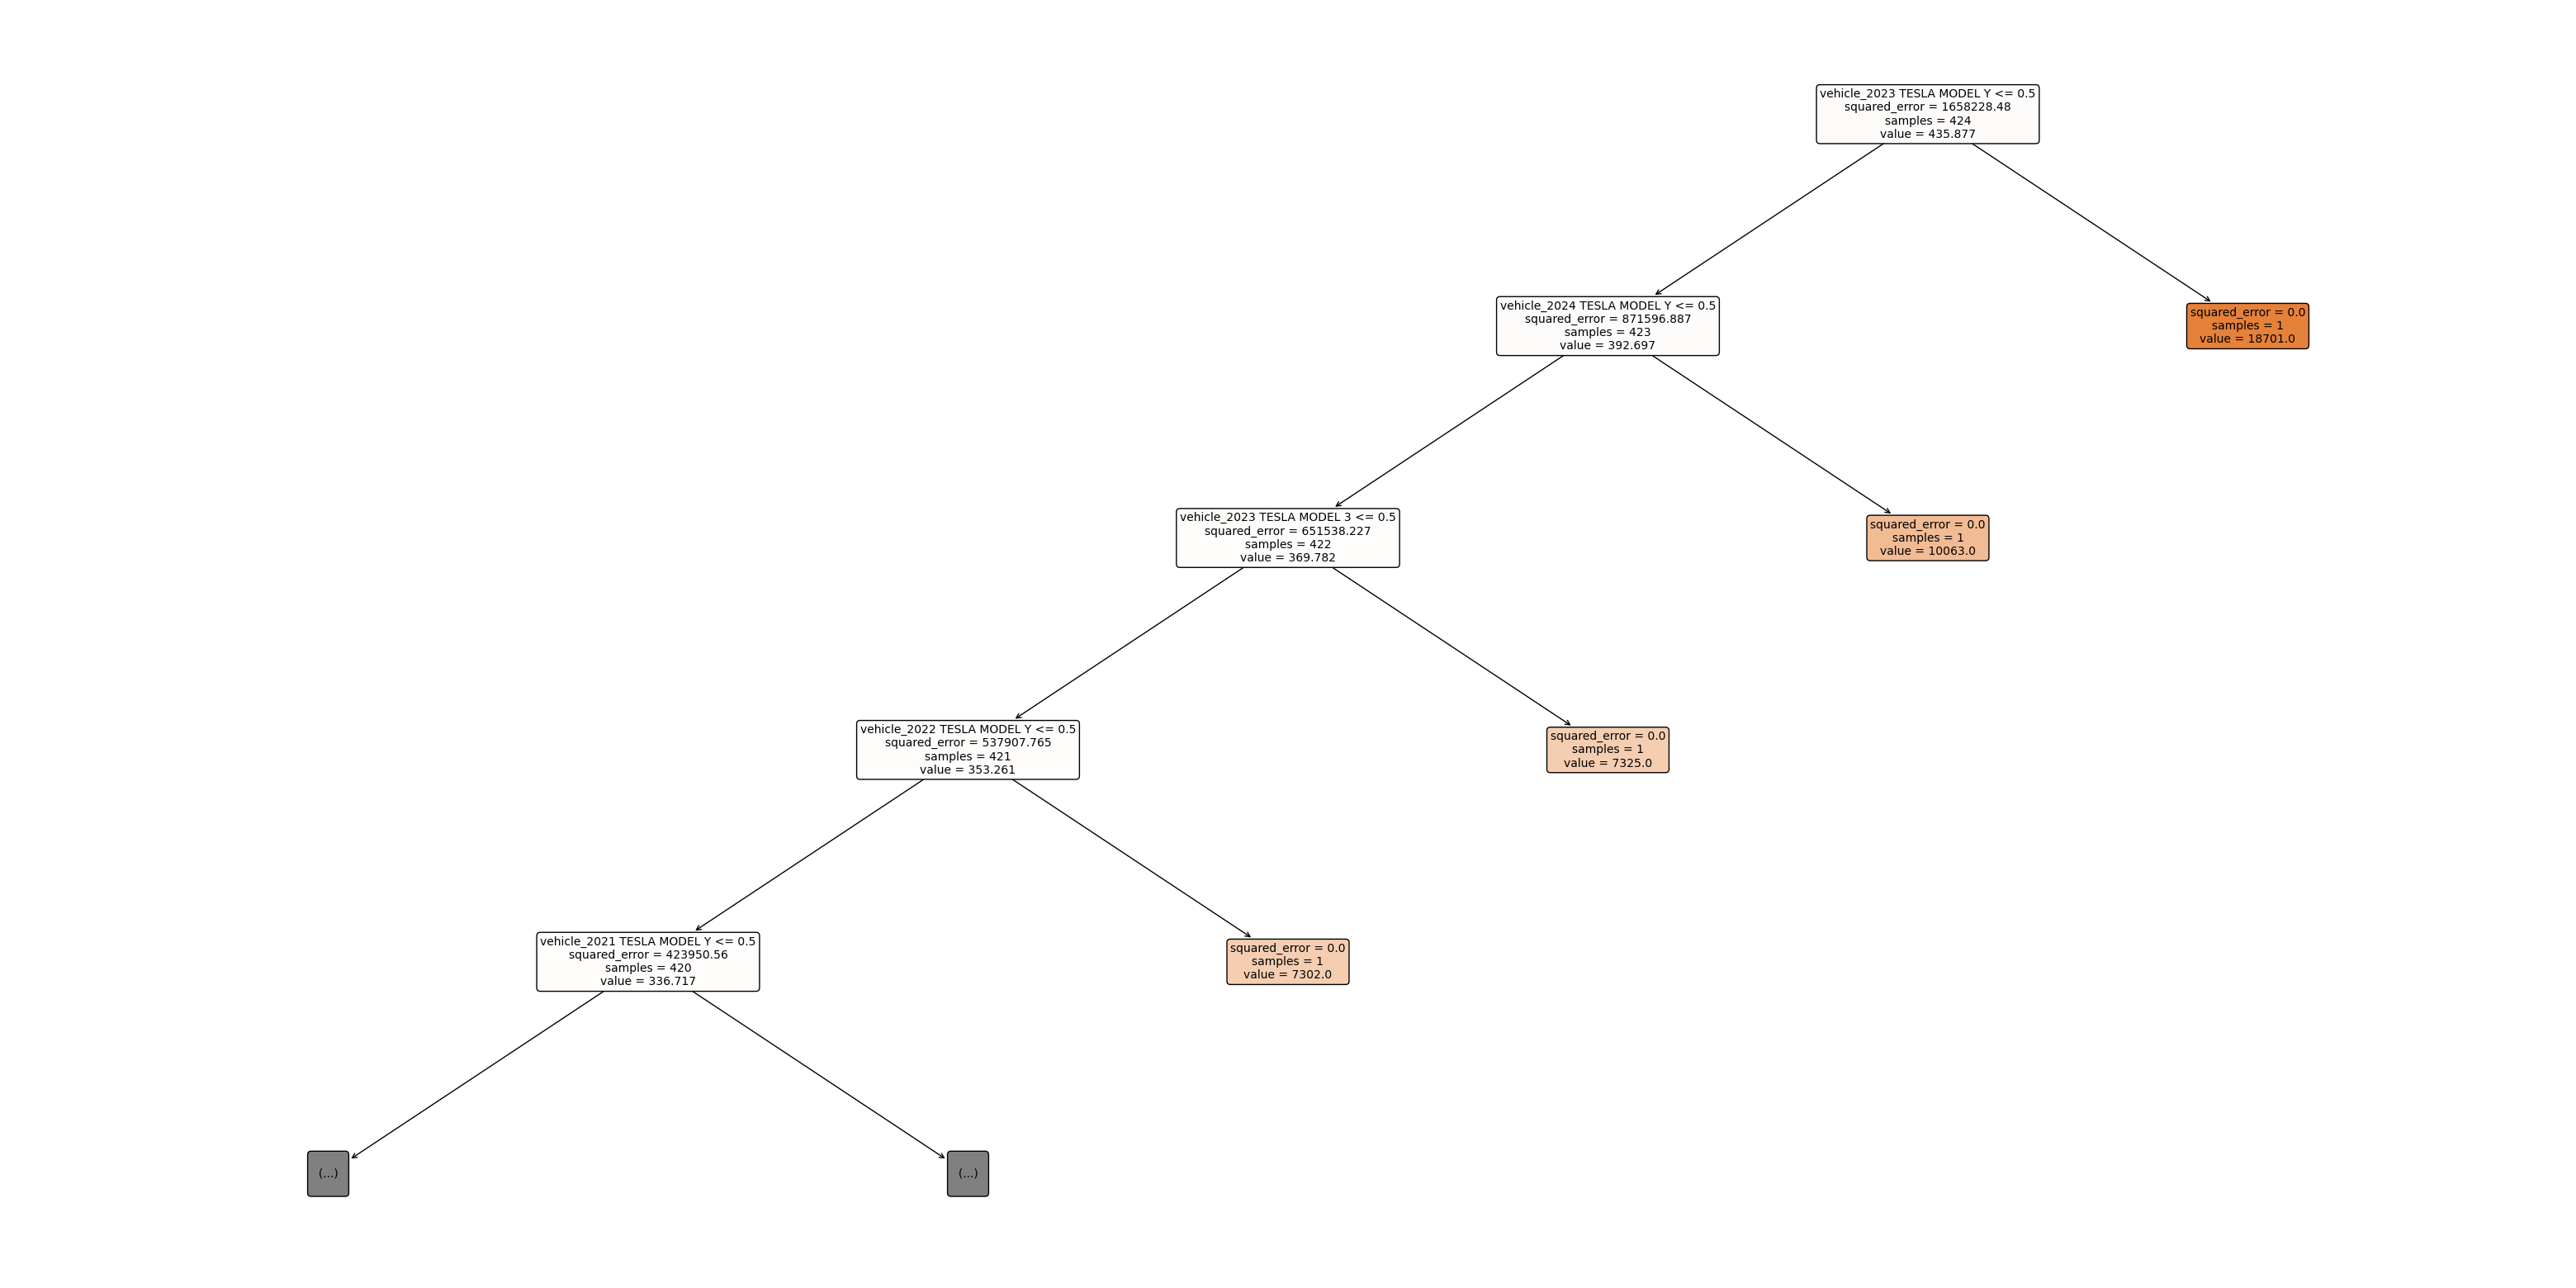

     Actual  Predicted
140      71       10.0
398     688      409.0
6         3      407.0
334     147        4.0
322     212        2.0


In [26]:
# Prepare the data
X = vehicle_income_count.drop(columns=['vehicle_n'])
y = vehicle_income_count['vehicle_n']

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression tree
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)


# Improve plot readability
plt.figure(figsize=(40, 20))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10, max_depth=4)
plt.show()

y_pred = regressor.predict(X_test)
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head())

The tree suggests that the vehicle name is the most important attribute, primarily splitting by Tesla models. However, we cannot determine if this is due to effective marketing, superior attributes of these models, or other underlying factors.

In [27]:
# Calculate R-squared value for training data
r_squared_train = regressor.score(X_train, y_train)
print(f"R-squared value for training data: {r_squared_train}")

# Calculate R-squared value for testing data
r_squared_test = regressor.score(X_test, y_test)
print(f"R-squared value for testing data: {r_squared_test}")
# Calculate mean squared error for testing data
mse_test = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error for testing data: {mse_test}")

R-squared value for training data: 1.0
R-squared value for testing data: -0.08790045979391903
Mean Squared Error for testing data: 448879.25471698114


## Random Forest

Since we are having a hard time getting good results with choosing of what features to use, we aim to automate this with a random forest.

Mean Squared Error: 919478.88
R² Score: -0.04
     Actual   Predicted
140      71  500.797443
398     688  316.260205
6         3  243.455812
334     147  111.525674
322     212  355.422787


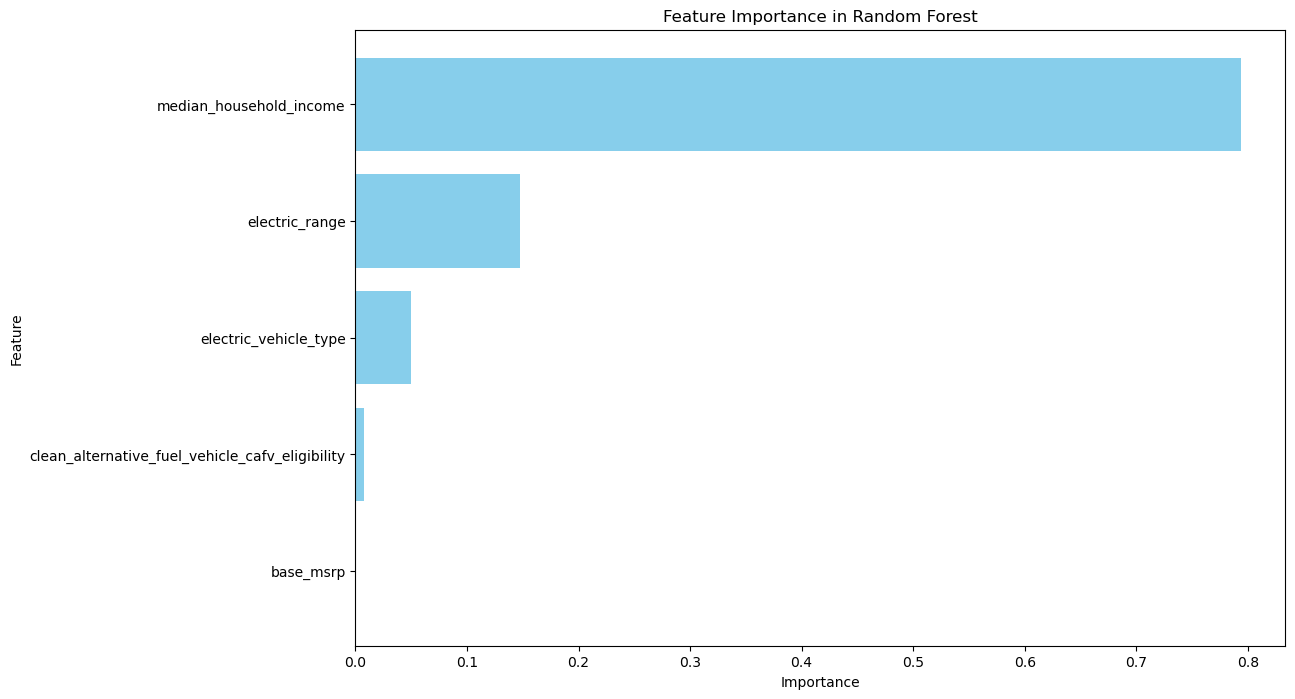

Training Data - MSE: 954651.86, R²: 0.42
Testing Data - MSE: 919478.88, R²: -0.04


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Handle missing values
vehicle_income_count['base_msrp'] = vehicle_income_count['base_msrp'].fillna(0)
vehicle_income_count['electric_range'] = vehicle_income_count['electric_range'].fillna(0)

# Prepare the data
X = vehicle_income_count.drop(columns=['vehicle', 'vehicle_n'])  # Drop target and irrelevant columns
y = vehicle_income_count['vehicle_n']  # Target variable

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)  # Adjust parameters as needed
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(results.head())

# Feature importance visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()





from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training and testing sets
y_train_pred = rf_regressor.predict(X_train)  # Predictions for training set
y_test_pred = rf_regressor.predict(X_test)    # Predictions for testing set

# Calculate MSE and R² for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate MSE and R² for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the results
print(f"Training Data - MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Testing Data - MSE: {test_mse:.2f}, R²: {test_r2:.2f}")

Here we can see that according to our model, the most important feature is `median_household_income`. Following that, `electric_range` is the next most significant feature, just before `electric_vehicle_type`. `CAFV_eligibility` does not seem to affect sales much, nor does `base_msrp` (which might be due to the fact that we have a lot of missing values here).